In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import the dataset

In [4]:
df = pd.read_csv(r"C:\Users\asus\OneDrive\DS Intellipat\Excel\Cricket.csv", encoding='latin1')

In [5]:
# BASIC PANDAS METHOD

In [6]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [7]:
df.shape

(79, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [9]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [10]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [11]:
# to convert the span into years of experience
# we first split the span into start and end and store in new column

In [12]:
df[["start", "end"]] = df.Span.str.split("-", expand= True)


In [13]:

df[["start", "end"]]

,start,end
0,1989,2012
1,2000,2015
2,1995,2012
3,1989,2011
4,1998,2015
...,...,...
74,1975,1991
75,2002,2015
76,2001,2011
77,1998,2009


In [14]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

In [15]:
df[['start','end']]=df[['start','end']].astype(int)
df['Exp']=df['end']-df['start']
df=df.drop(['start','end', 'Span'], axis = 1) 
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [16]:
df.head(10)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137*,39.52,15812,74.24,10,83,20,16
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15
9,BC Lara (ICC/WI),299,289,32,10405,169,40.48,13086,79.51,19,63,16,17


In [17]:
# df = df.drop(["End"], axis = 1)

Check for outliers

In [18]:
df.HS = df.HS.str.extract("(\d+)")
df.HS = df.HS.astype(int)

In [19]:
df.head()


,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


Text(0.5, 1.0, '0')

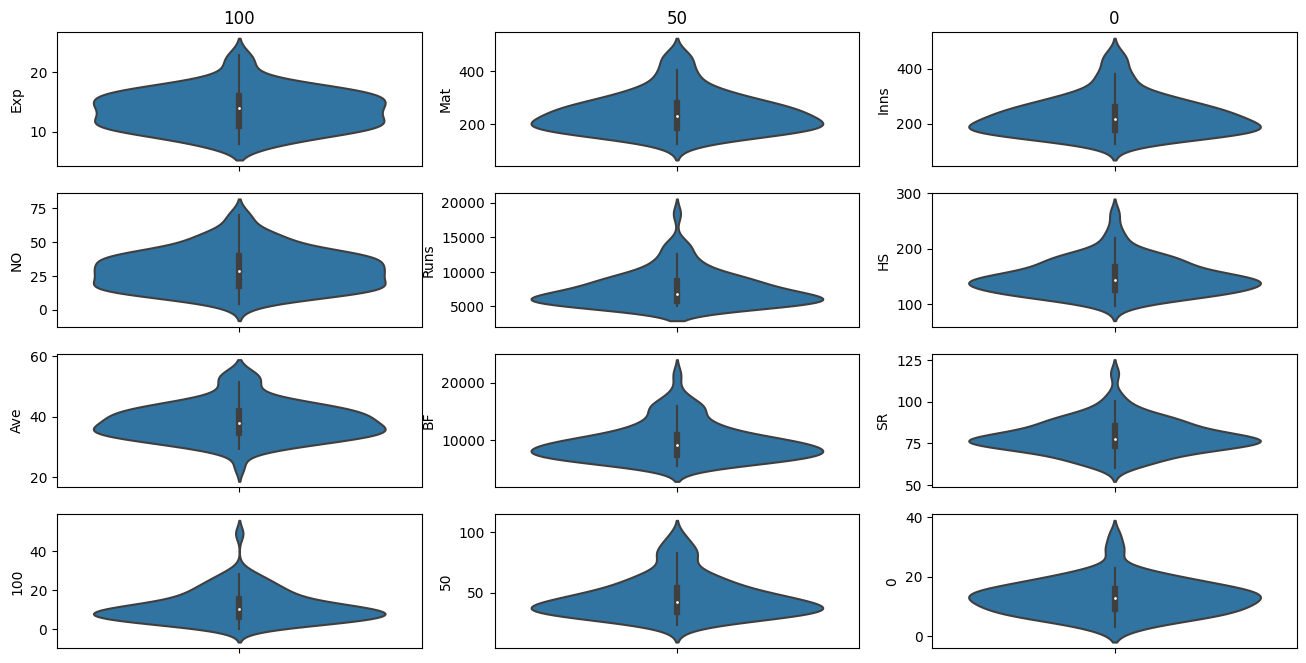

In [20]:
f, axes = plt.subplots(4, 3, figsize = (16, 8))
s = sns.violinplot(y = df["Exp"], ax = axes[0, 0])
axes[0, 0].set_title("Exp")
s = sns.violinplot(y = df.Mat, ax = axes[0, 1])
axes[0, 1].set_title("Mat")
s = sns.violinplot(y = df.Inns, ax = axes[0, 2])
axes[0, 2].set_title("Inns")
s = sns.violinplot(y = df["NO"], ax = axes[1, 0])
axes[0, 0].set_title("NO")
s = sns.violinplot(y = df.Runs, ax = axes[1, 1])
axes[0, 1].set_title("Runs")
s = sns.violinplot(y = df["HS"], ax = axes[1, 2])
axes[0, 2].set_title("HS")
s = sns.violinplot(y = df.Ave, ax = axes[2, 0])
axes[0, 0].set_title("Avg")
s = sns.violinplot(y = df["BF"], ax = axes[2, 1])
axes[0, 1].set_title("BF")
s = sns.violinplot(y = df["SR"], ax = axes[2, 2])
axes[0, 2].set_title("SR")
s = sns.violinplot(y = df["100"], ax = axes[3, 0])
axes[0, 0].set_title("100")
s = sns.violinplot(y = df["50"], ax = axes[3, 1])
axes[0, 1].set_title("50")
s = sns.violinplot(y = df["0"], ax = axes[3, 2])
axes[0, 2].set_title("0")

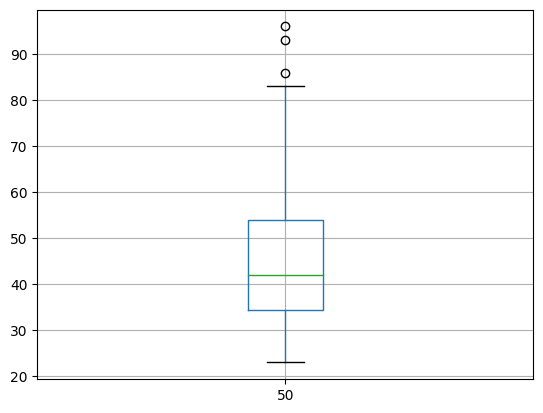

In [21]:
def plot_boxplot(df, col):
    df.boxplot(column = [col])
    plt.grid = False
    plt.show()

plot_boxplot(df, "50")    


In [22]:
Q3 = df.Mat.quantile(0.99)
Q1 = df.Mat.quantile(0.01)
df['Mat'][df['Mat']<=Q1]=Q1
df['Mat'][df['Mat']>=Q3]=Q3

Q3 = df.Inns.quantile(0.99)
Q1 = df.Inns.quantile(0.01)
df['Inns'][df['Inns']<=Q1]=Q1
df['Inns'][df['Inns']>=Q3]=Q3

Q3 = df.NO.quantile(0.99)
Q1 = df.NO.quantile(0.01)
df['NO'][df['NO']<=Q1]=Q1
df['NO'][df['NO']>=Q3]=Q3

Q3 = df.Runs.quantile(0.99)
Q1 = df.Runs.quantile(0.01)
df['Runs'][df['Runs']<=Q1]=Q1
df['Runs'][df['Runs']>=Q3]=Q3

Q3 = df.HS.quantile(0.99)
Q1 = df.HS.quantile(0.01)
df['HS'][df['HS']<=Q1]=Q1
df['HS'][df['HS']>=Q3]=Q3

Q3 = df.Ave.quantile(0.99)
Q1 = df.Ave.quantile(0.01)
df['Ave'][df['Ave']<=Q1]=Q1
df['Ave'][df['Ave']>=Q3]=Q3

Q3 = df.BF.quantile(0.99)
Q1 = df.BF.quantile(0.01)
df['BF'][df['BF']<=Q1]=Q1
df['BF'][df['BF']>=Q3]=Q3

Q3 = df.SR.quantile(0.99)
Q1 = df.SR.quantile(0.01)
df['SR'][df['SR']<=Q1]=Q1
df['SR'][df['SR']>=Q3]=Q3

Q3 = df.Exp.quantile(0.99)
Q1 = df.Exp.quantile(0.01)
df['Exp'][df['Exp']<=Q1]=Q1
df['Exp'][df['Exp']>=Q3]=Q3

Q3 = df['100'].quantile(0.99)
Q1 = df['100'].quantile(0.01)
df['100'][df['100']<=Q1]=Q1
df['100'][df['100']>=Q3]=Q3

Q3 = df['50'].quantile(0.99)
Q1 = df['50'].quantile(0.01)
df['50'][df['50']<=Q1]=Q1
df['50'][df['50']>=Q3]=Q3

Q3 = df['0'].quantile(0.99)
Q1 = df['0'].quantile(0.01)
df['0'][df['0']<=Q1]=Q1
df['0'][df['0']>=Q3]=Q3

C:\Users\asus\AppData\Local\Temp\ipykernel_15812\3844684556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mat'][df['Mat']<=Q1]=Q1
C:\Users\asus\AppData\Local\Temp\ipykernel_15812\3844684556.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inns'][df['Inns']<=Q1]=Q1
C:\Users\asus\AppData\Local\Temp\ipykernel_15812\3844684556.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NO'][df['NO']<=Q1]=Q1
C:\Users\asus\AppD

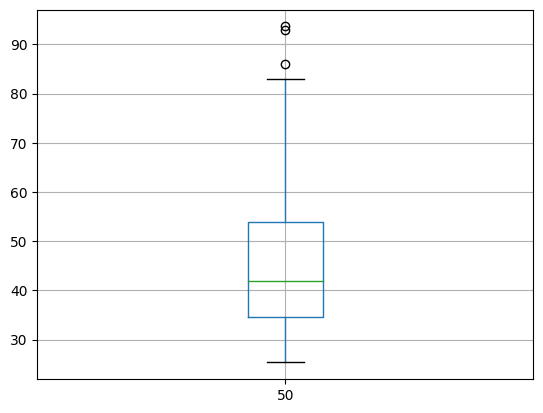

In [23]:
def plot_boxplot(df, col):
    df.boxplot(column = [col])
    plt.grid = False
    plt.show()

plot_boxplot(df, "50")    


Text(0.5, 1.0, 'Mat')

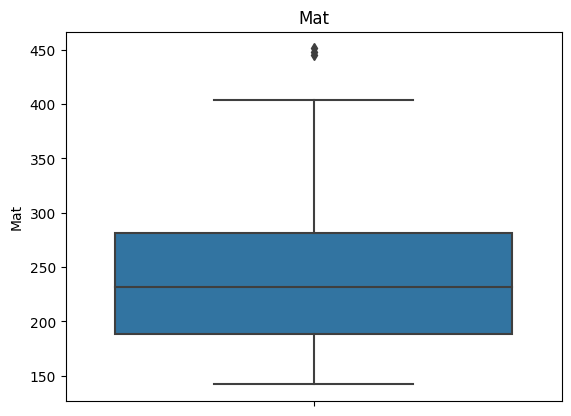

In [24]:
s = sns.boxplot(y = df.Mat)
s.set_title("Mat")

In [25]:
df_drop = df.copy()
player = df_drop.pop("Player")

In [26]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00


In [27]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
df_scaled

array([[ 2.82279967e+00,  2.99188395e+00,  7.72431175e-01,
         3.18356123e+00,  1.69403032e+00,  1.08826122e+00,
         2.98241352e+00,  7.49179671e-01,  3.13264038e+00,
         2.92935542e+00,  1.17861903e+00,  2.59980337e+00],
       [ 2.17526315e+00,  2.16409181e+00,  7.72431175e-01,
         2.79619505e+00,  6.63399607e-01,  5.92157985e-01,
         2.74368859e+00, -3.56865202e-02,  1.87083605e+00,
         2.88840881e+00,  3.10241582e-01,  3.87084249e-01],
       [ 1.77825344e+00,  1.94693753e+00,  6.31248299e-01,
         2.57358047e+00,  4.97168847e-01,  6.00861551e-01,
         2.41609488e+00,  1.27250423e-01,  2.55809331e+00,
         2.20596529e+00,  1.17861903e+00,  1.00002583e+00],
       [ 2.73655274e+00,  2.93137029e+00, -8.51171904e-01,
         2.45849293e+00,  1.32832265e+00, -1.08240802e+00,
         1.65726753e+00,  1.27845850e+00,  2.28319041e+00,
         1.33740082e+00,  3.06820835e+00,  2.53237980e+00],
       [ 2.77762271e+00,  2.71421601e+00,  6.3124829

In [29]:
df_new = pd.DataFrame(df_scaled, columns = ["Mat", "Inns",	"NO",	"Runs",	"HS",	"Ave",	"BF",	"SR",	"100",	"50",	"0",	"Exp"])
df_new.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


### Implementing K means

In [30]:
from sklearn.cluster import KMeans

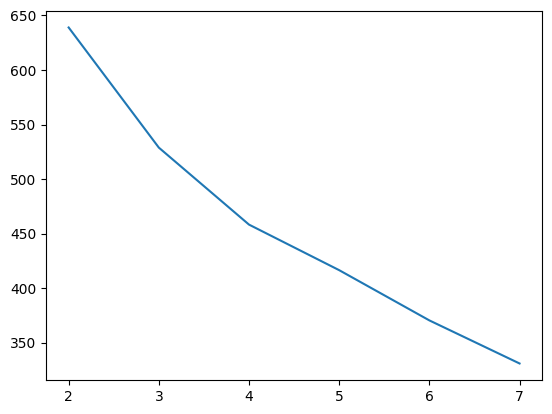

In [31]:
clusters = list(range(2, 8))
wcss = []
for i in clusters:
    model_clus = KMeans(n_clusters=i)
    model_clus.fit(df_new)
    wcss.append(model_clus.inertia_)

plt.plot(clusters, wcss)

In [32]:
df_new.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


In [33]:
cluster = KMeans(n_clusters=4)
cluster.fit(df_new)

KMeans(n_clusters=4)

In [34]:
df["Cluster ID"] = cluster.labels_
df.tail()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster ID
74,CG Greenidge (WI),142.04,139.48,13.0,5134.00,133.00,45.03,7908.00,64.92,11.00,31.00,3.0,16.0,0
75,Misbah-ul-Haq (PAK),162.00,149.00,31.0,5122.00,100.68,43.40,6945.00,73.75,1.56,42.00,6.0,13.0,0
76,PD Collingwood (ENG),197.00,181.00,37.0,5092.00,120.00,35.36,6614.00,76.98,5.00,26.00,7.0,10.0,0
77,A Symonds (AUS),198.00,161.00,33.0,5088.00,156.00,39.75,5842.52,92.44,6.00,30.00,15.0,11.0,0
78,Abdul Razzaq (Asia/PAK),265.00,228.00,57.0,5086.24,112.00,29.70,6252.00,81.25,3.00,25.34,14.0,15.0,0


In [37]:
df[df["Cluster ID"] == 1].sort_values(by = ["NO", "Ave", "SR"], ascending= [True, False, False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster ID
12,AC Gilchrist (AUS/ICC),287.0,279.0,11.0,9619.0,172.0,35.89,9922.0,96.94,16.0,55.0,19.0,12.0,1
36,NJ Astle (NZ),223.0,217.0,14.0,7090.0,145.0,34.92,9760.0,72.64,16.0,41.0,19.0,12.0,1
26,HH Gibbs (SA),248.0,240.0,16.0,8094.0,175.0,36.13,9721.0,83.26,21.0,37.0,22.0,14.0,1
17,CH Gayle (ICC/WI),269.0,264.0,17.0,9221.0,215.0,37.33,10834.0,85.11,22.0,47.0,23.0,16.0,1
43,GW Flower (ZIM),221.0,214.0,18.0,6571.0,142.0,33.52,9723.0,67.58,6.0,40.0,18.0,18.0,1


In [38]:
27 + 34 + 32 + 11

104